## IMPORT LIBRARIES

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
# Model  Building
from sklearn.neighbors import KNeighborsClassifier
# Model Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [150]:
df = pd.read_csv('E:\ExcelR Assignment\Assignment 13 - KNN\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [23]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [24]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [25]:
df.shape

(214, 10)

In [26]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

## 1. Data Analysis & Data Visualization

### Univariate Analysis for Continuous Variables

<AxesSubplot:xlabel='Fe', ylabel='Density'>

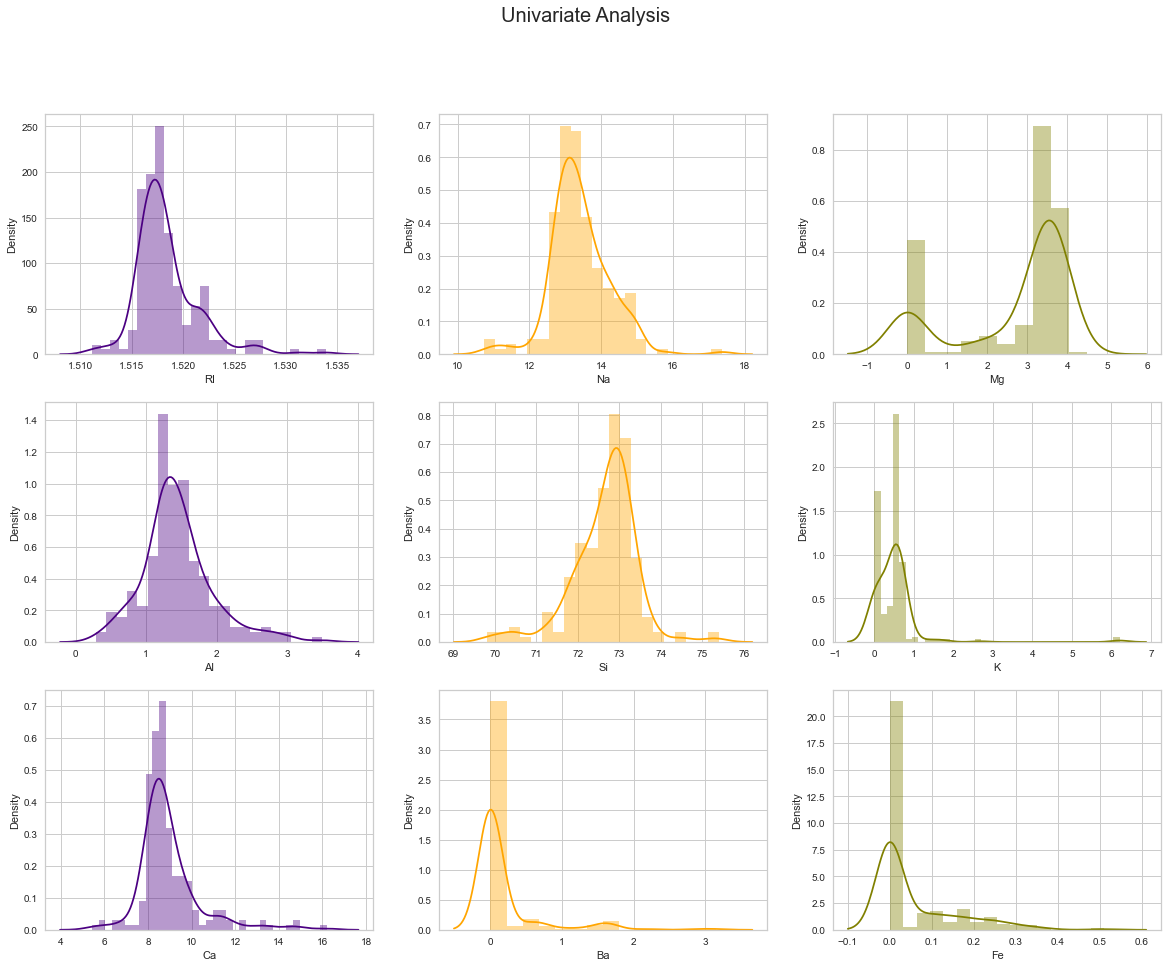

In [27]:
import warnings
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(df['RI'],ax=axes[0,0],color='indigo')
sns.distplot(df['Na'],ax=axes[0,1],color='orange')
sns.distplot(df['Mg'],ax=axes[0,2],color='olive')
sns.distplot(df['Al'],ax=axes[1,0],color='indigo')
sns.distplot(df['Si'],ax=axes[1,1],color='orange')
sns.distplot(df['K'],ax=axes[1,2],color='olive')
sns.distplot(df['Ca'],ax=axes[2,0],color='indigo')
sns.distplot(df['Ba'],ax=axes[2,1],color='orange')
sns.distplot(df['Fe'],ax=axes[2,2],color='olive')

### Inferences:

1. Left Skewness :  Mg
2. Right Skewness : RI | K | Ca | Ba | Fe 
3. Al | Si | Na  seems to have normally distribution

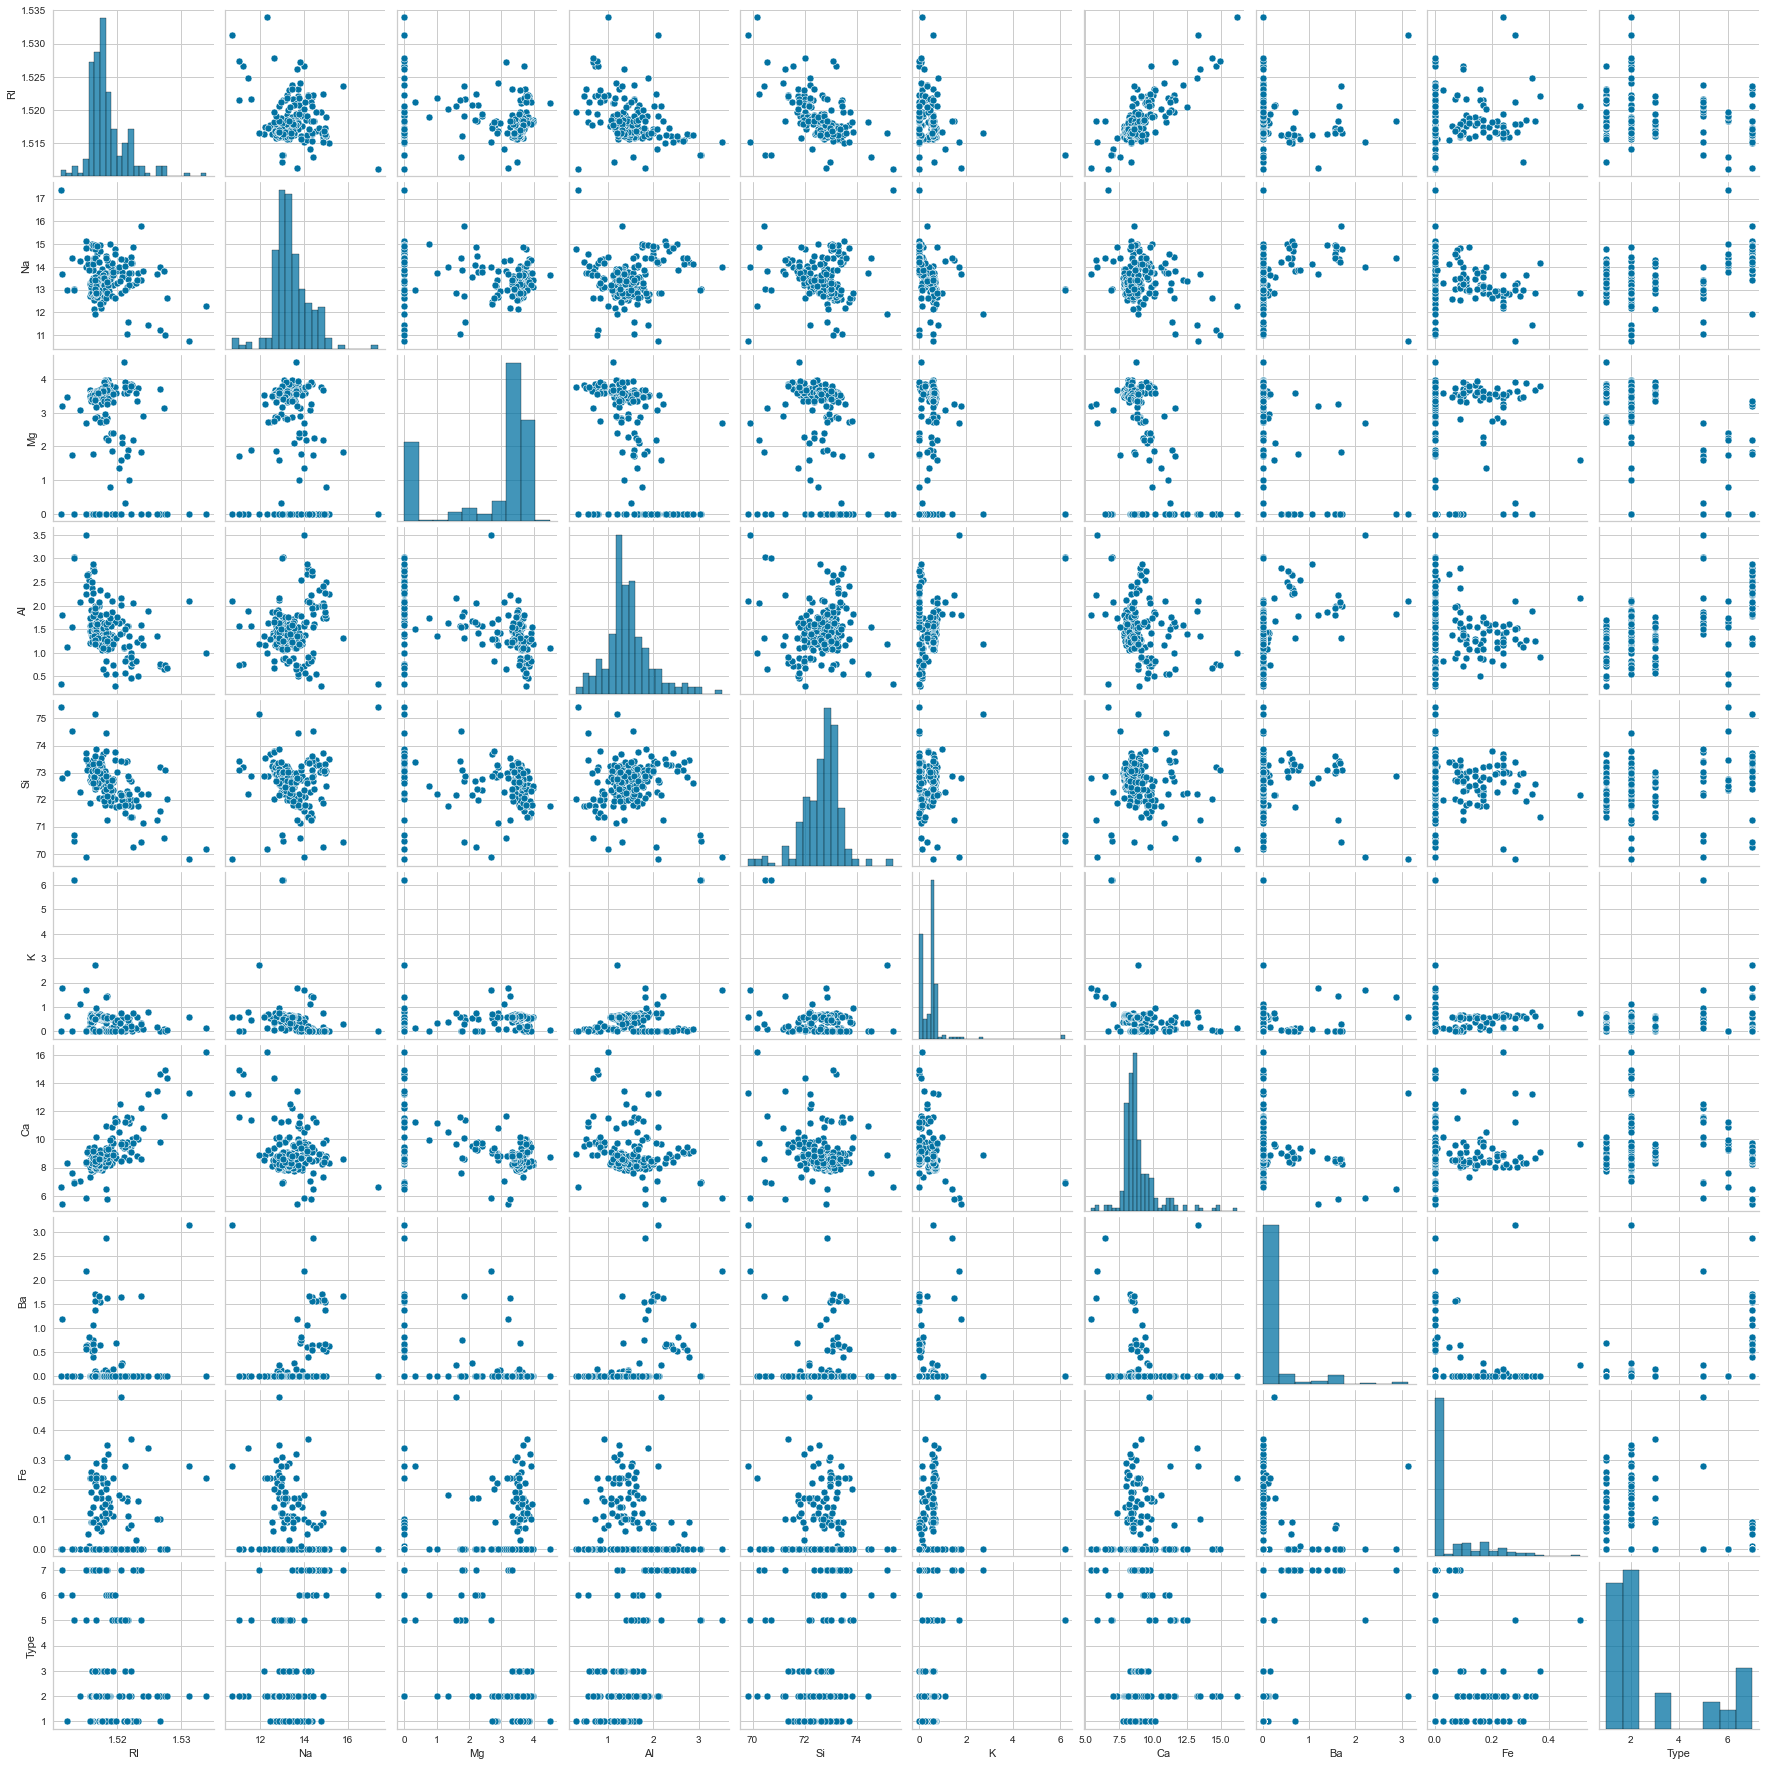

In [28]:
sns.pairplot(df)

In [29]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

## Splitting the variables

In [151]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

## Up-sampling as the Target Variable is not balanced

In [152]:
from imblearn.combine import SMOTETomek
# Performing Oversampling method to handle imbalanced data

smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,Y)

## Train-Test Split Model Validation Technique

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

## Transforming Variables

In [154]:
def stand_func(i):
    x = (i-i.mean())/(i.std())
    return (x)
X_train = stand_func(X_train)
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
126,-0.547617,-0.903760,1.004486,0.113900,0.573022,0.220350,-0.854516,-0.435634,-0.507669
214,-0.163205,-0.010742,1.065063,-1.645410,0.378767,-0.510880,-0.194728,-0.435634,-0.507669
269,1.161728,-0.747296,-1.168419,-0.115670,0.774593,-0.410489,1.560666,-0.435634,2.183160
399,-0.456485,1.428087,-1.372315,0.565479,0.454106,-0.590280,-0.514765,2.646745,-0.507669
258,1.203080,-2.128675,-0.152479,0.186663,0.061258,0.066748,1.367984,-0.346247,0.530251


In [155]:
X_test = stand_func(X_test)
X_test.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
194,-0.718863,0.634269,-1.420392,1.929622,-0.044793,-0.527943,0.103863,1.464959,-0.480865
240,-0.083305,0.021872,1.009580,-1.455964,0.371976,-0.544056,-0.102378,-0.484830,-0.480865
83,-0.694182,-1.122455,0.795631,-0.248040,0.740660,0.232489,-0.543465,-0.484830,-0.480865
297,1.172289,-0.562663,-1.305597,-0.298955,0.231775,-0.340472,1.947397,-0.484830,1.156591
68,-0.702409,-0.766197,0.961999,-0.169706,0.213117,0.155157,-0.681194,-0.484830,-0.480865


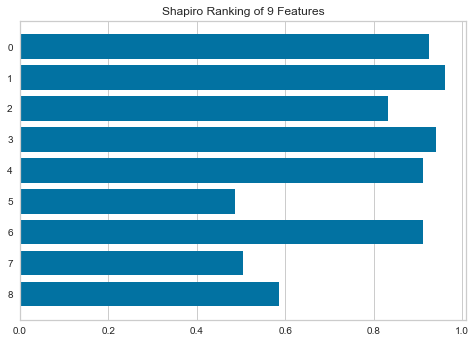

<AxesSubplot:title={'center':'Shapiro Ranking of 9 Features'}>

In [113]:
from yellowbrick.features import Rank1D
visualizer = Rank1D(algorithm='shapiro')
visualizer.fit(X_train, y_train)                  # Fit the data to the visualizer
visualizer.transform(X_train)                     # Transform the data
visualizer.show()

## Grid-Search-CV on KNN Classifier

In [156]:
kmodel = KNeighborsClassifier()
param_grid = [{'n_neighbors':range(2,20)}]
gsv = GridSearchCV(kmodel,param_grid)
gsv.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': range(2, 20)}])

In [157]:
gsv.best_params_,gsv.best_score_

({'n_neighbors': 2}, 0.8763561076604555)

## Build KNN model

In [158]:
result1 = []
result2 = []
for n in range(2,10):
    model = KNeighborsClassifier(n_neighbors=n,metric='euclidean')
    model.fit(X_train,y_train)
    result1.append(model.score(X_train,y_train))
    result2.append(model.score(X_test,y_test))
frame = pd.DataFrame({'n_neighbors':range(2,10),'Train Accuracy':result1,'Test Accuracy':result2})
frame

,n_neighbors,Train Accuracy,Test Accuracy
0,2,0.956772,0.850575
1,3,0.942363,0.850575
2,4,0.904899,0.804598
3,5,0.893372,0.804598
4,6,0.870317,0.804598
5,7,0.858790,0.804598
6,8,0.855908,0.793103
7,9,0.847262,0.770115


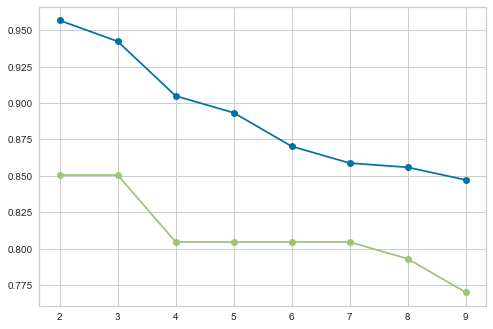

In [159]:
plt.plot(frame['n_neighbors'],frame['Train Accuracy'],marker='o')
plt.plot(frame['n_neighbors'],frame['Test Accuracy'],marker='o')

### Choosing n_neighbors = 7 would bring Train and Test Accuracy closer to each other.

In [160]:
model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
model.fit(X_train,y_train)
result1 = model.score(X_train,y_train)
result2 = model.score(X_test,y_test)

In [161]:
result1,result2

(0.8587896253602305, 0.8045977011494253)

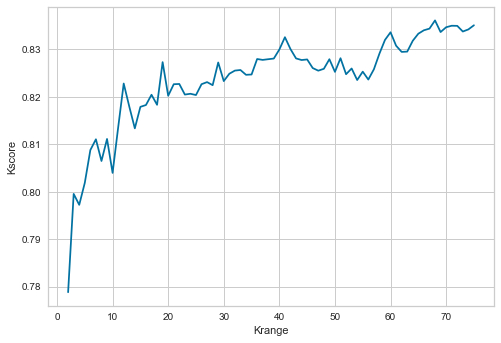

In [225]:
krange = range(2,76)
kscore = []
for k in krange:
    model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
    model.fit(X_res,y_res)
    result6=cross_val_score(model, X_res,y_res,cv=k)
    kscore.append(result6.mean())
    
plt.plot(krange,kscore)
plt.xlabel('Krange',)
plt.ylabel('Kscore')
plt.show()

## K-Fold Cross Validation

In [257]:
kfold = KFold(n_splits=59)
model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
model.fit(X_res,y_res)
result3=cross_val_score(model, X_res,y_res,cv=kfold)
result3.mean()

0.8123486682808717

In [232]:
df1 = pd.concat([X_train,y_train],axis=1)

In [239]:
df2 = pd.concat([X_test,y_test],axis=1)

<AxesSubplot:xlabel='RI', ylabel='Na'>

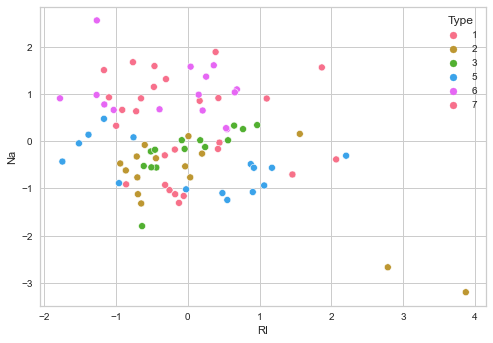

In [262]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,1],hue="Type",palette='husl')

<AxesSubplot:xlabel='RI', ylabel='Mg'>

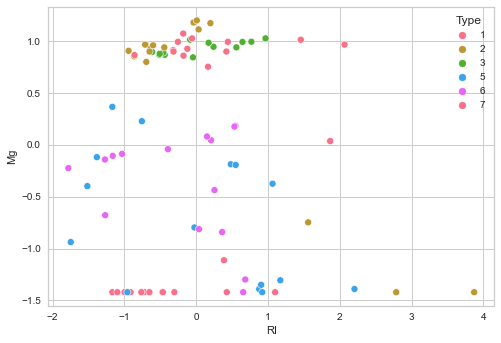

In [263]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,2],hue="Type",palette='husl')

<AxesSubplot:xlabel='RI', ylabel='Al'>

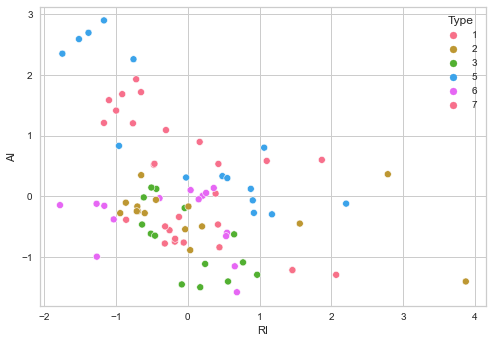

In [264]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,3],hue="Type",palette='husl')

<AxesSubplot:xlabel='RI', ylabel='Si'>

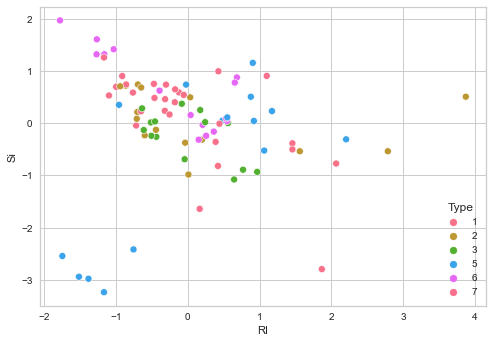

In [265]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,4],hue="Type",palette='husl')

<AxesSubplot:xlabel='RI', ylabel='K'>

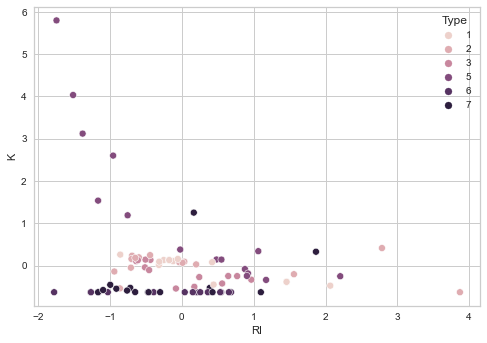

In [251]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,5],hue="Type")

<AxesSubplot:xlabel='RI', ylabel='Ca'>

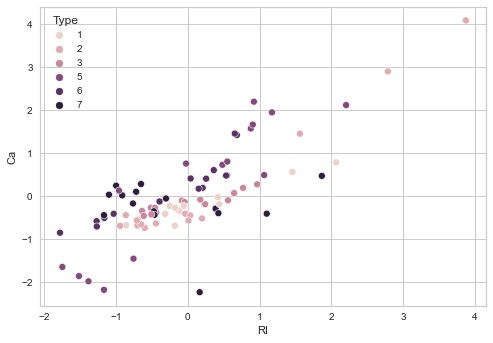

In [252]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,6],hue="Type")

<AxesSubplot:xlabel='RI', ylabel='Ba'>

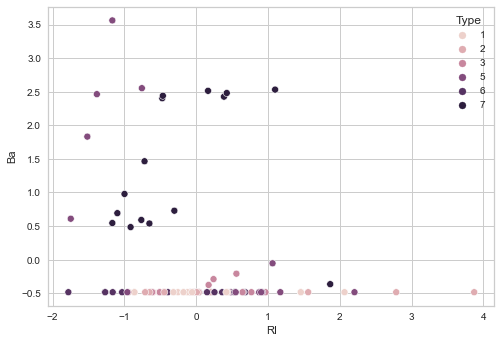

In [253]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,7],hue="Type")

<AxesSubplot:xlabel='RI', ylabel='Fe'>

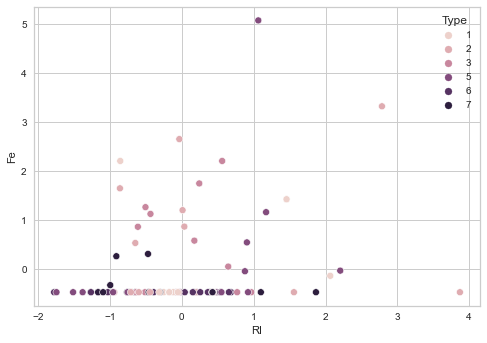

In [254]:
sns.scatterplot(data=df2,x=X_test.iloc[:,0],y=X_test.iloc[:,8],hue="Type")

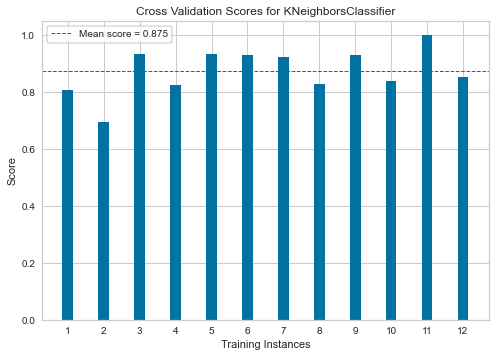

<AxesSubplot:title={'center':'Cross Validation Scores for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [21]:
# Instantiate the classification model and visualizer
from yellowbrick.model_selection import CVScores
cv = KFold(n_splits=12)
visualizer = CVScores(model, cv=cv, scoring='f1_weighted')

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()